# Model Selection and Evaluation

---

## Logistic Regression

In [1]:
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#load prepared dataset from notebook
loan_prepared = np.loadtxt('loan_prepared.txt')
loan_labels = np.loadtxt('loan_labels.txt')

In [3]:
#load logistic regression model
log_reg = LogisticRegression()

In [4]:
#fit model onto data
log_reg.fit(loan_prepared, loan_labels)

LogisticRegression()

In [5]:
#calculate scores of predictions using cross validation
loan_predictions = log_reg.predict(loan_prepared)
scores = cross_val_score(log_reg, loan_prepared, loan_labels, cv=10, scoring="f1")
scores

array([0.9511811 , 0.94201747, 0.94342629, 0.93596838, 0.93196203,
       0.93970243, 0.94126984, 0.94360604, 0.94210944, 0.94200627])

In [6]:
#f1 score mean
print("f1 score: ", scores.mean())

f1 score:  0.9413249288050534


<AxesSubplot:>

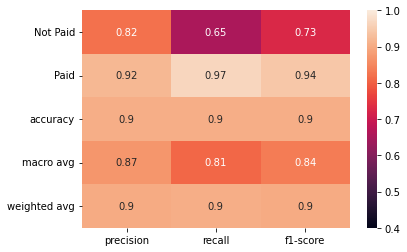

In [7]:
#visualize score
clf_report = classification_report(y_true=loan_labels,
                                   y_pred=loan_predictions,
                                   target_names=['Not Paid','Paid'],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, vmin=0.4, vmax=1, annot=True)

---

## Random Forest Classifier

In [8]:
#load random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [9]:
#fit model onto data
rfc.fit(loan_prepared, loan_labels)

RandomForestClassifier(max_features='sqrt')

In [10]:
#calculate scores of predcitions using cross validation
loan_predictions = rfc.predict(loan_prepared)
scores = cross_val_score(rfc, loan_prepared, loan_labels, cv=10, scoring="f1")
scores

array([0.98795181, 0.99194847, 0.99512987, 0.99514563, 0.99030695,
       0.99193548, 0.99190939, 0.99756691, 0.99353796, 0.99112187])

In [11]:
#f1 score mean
scores.mean()

0.9926554341220809

In [12]:
print(metrics.classification_report(loan_labels, loan_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1496
         1.0       1.00      1.00      1.00      6166

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [13]:
#tune hyperparameters using grid search
param_grid = {'n_estimators': [100, 150, 200],'max_features': ['sqrt', 'log2']}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring="f1")
grid_search.fit(loan_prepared, loan_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_features='sqrt'),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200]},
             scoring='f1')

In [14]:
#find best hyperparameters
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 150}

In [15]:
#mean f1 score after tuning
print("f1 score: ", grid_search.cv_results_['mean_test_score'].max())

f1 score:  0.9928146497391666


<AxesSubplot:>

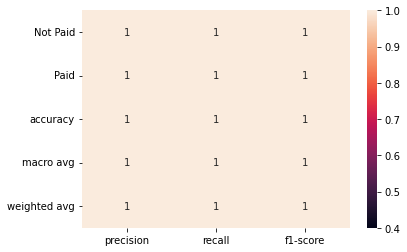

In [16]:
#visualize score
clf_report = classification_report(y_true=loan_labels,
                                   y_pred=loan_predictions,
                                   target_names=['Not Paid','Paid'],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, vmin=0.4, vmax=1, annot=True)

---

## Scores from Test Set

In [17]:
#use test set
test_features = np.loadtxt('test_features.txt')
test_labels = np.loadtxt('test_labels.txt')

In [18]:
#random forest classifier with hyperparameter tuning
rfc = RandomForestClassifier(n_estimators = 150, max_features='log2')

In [19]:
#fit model onto data
rfc.fit(test_features, test_labels)

RandomForestClassifier(max_features='log2', n_estimators=150)

In [20]:
#calculate scores of predictions using cross validation
test_predictions = rfc.predict(test_features)
scores = cross_val_score(rfc, test_features, test_labels, cv=10, scoring='f1')
scores

array([0.99358974, 0.99041534, 0.97791798, 0.98717949, 0.99029126,
       0.9903537 , 0.9903537 , 0.99350649, 0.99354839, 0.99676375])

In [21]:
#f1 score mean
print("f1 score: ", scores.mean())

f1 score:  0.9903919839587936


<AxesSubplot:>

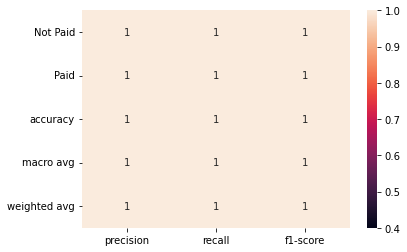

In [22]:
#visualize score
clf_report = classification_report(y_true=test_labels,
                                   y_pred=test_predictions,
                                   target_names=['Not Paid','Paid'],
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, vmin=0.4,vmax=1, annot=True)